# MOWNIT - LAB 4 - Symulacja wyzarzania

In [416]:
import random
import math
import matplotlib.pyplot as plt
import copy
import numpy
import pandas as pd

In [384]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [385]:
def matrix_distance(points):

    def distance(p1, p2):
        x2 = (p1.x - p2.x)**2
        y2 = (p1.y - p2.y)**2
        return math.sqrt(x2 + y2)

    n = len(points)
    matrix = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            r = distance(points[i], points[j])
            matrix[i][j] = r
            matrix[j][i] = r
    return matrix

def full_cycle_len(cycle, matrix):
    length = 0
    for i in range(len(matrix)):
            length += matrix[cycle[i]][cycle[i-1]]
    return length


def get_probability(x):
    return x*0.999


def annealing_tsp(n, points, p=0.8, temperature = lambda x: x*0.95, arbitrary_swap=True, iterations=2000000):
    result_in_time = []
    matrix = matrix_distance(points)
    cykl = [i for i in range(n)]
    random.shuffle(cykl)

    result_now = full_cycle_len(cykl, matrix)
    best_in_histry = [result_now, cykl]
    result_in_time.append(result_now)

    for i in range(iterations):
        if arbitrary_swap:
            swap_1 = random.randint(0,n-1)
            swap_2 = random.randint(0,n-1)
        else:
            swap_1 = random.randint(0,n-1)
            swap_2 = (swap_1 - 1) % n

        while swap_2 == swap_1:
              swap_1 = random.randint(0,n-1)

        cykl[swap_1], cykl[swap_2] = cykl[swap_2], cykl[swap_1]

        result_new = full_cycle_len(cykl, matrix)

        p = temperature(p)
        decision = random.random()

        if(result_new < result_now):
            result_now = result_new
            if result_now < best_in_histry[0]:
                best_in_histry = [result_now, copy.deepcopy(cykl)]
            result_in_time.append(result_now)
        else:
            if decision < p:
                result_now = result_new
                if result_now < best_in_histry[0]:
                    best_in_histry = [result_now, cykl]
                result_in_time.append(result_now)
            else:
                cykl[swap_1], cykl[swap_2] = cykl[swap_2], cykl[swap_1]

    if(best_in_histry[0] < result_now):
        return result_in_time, best_in_histry[0], best_in_histry[1]

    return result_in_time, result_now, cykl


In [386]:
def tsp(n, points, p=0.8, temperature = lambda x: x*0.95, arbitrary_swap=True, iterations=2000000):
    best = annealing_tsp(n, points, p, temperature, arbitrary_swap, iterations)
    for p in range(5,11,1):
        for i in range(4):
            new = annealing_tsp(n, points, p/10, temperature, arbitrary_swap, iterations)
            if new[1] < best[1]:
                best = new
    return best[0], best[-1]

In [387]:
def create_unifrom_graph(n):
    points = []
    for p in range(n):
        p = Point(random.uniform(0,100), random.uniform(0,100))
        points.append(p)
    return points

In [388]:
def create_normal_graph(n):
    generated = numpy.random.normal(50,50,(n,2))
    points = []
    for i in range(n):
        p = Point(generated[i][0], generated[i][1])
        points.append(p)
    return points

In [389]:
def create_seperated_group_graph(n):
    num = n // 9
    points = []
    for i in range(3):
        for j in range(3):
            for p in range(num):
                point = Point(random.uniform(i*20, i*20+5), random.uniform(j*20,j*20+5))
                points.append(point)
    return points
        

In [390]:
def create_graph(x):
    plt.plot(x)
    plt.show()
    return

def create_chart(points, cycle):
    x=[]
    y=[]
    for p in cycle:
        point = points[p]
        x.append(point.x)
        y.append(point.y)
    x.append(points[cycle[0]].x)
    y.append(points[cycle[0]].y)
    plt.plot(x,y, color = 'green', marker = "o")
    plt.show()
    return

def create_vis(results, points, cycle):
    _, ax = plt.subplots(nrows=1, ncols=2)

    ax[0].plot(results)

    x=[]
    y=[]
    for p in cycle:
        point = points[p]
        x.append(point.x)
        y.append(point.y)
    x.append(points[cycle[0]].x)
    y.append(points[cycle[0]].y)
    ax[1].plot(x,y, marker = "o")
    plt.show()

## **Wizualizacje** podpunkt a - rozwiązania dla 3 róznych ilości punktów oraz 3 róznych rozkładów

# N = 20

### **UNIFORM DISTRIBUTION**

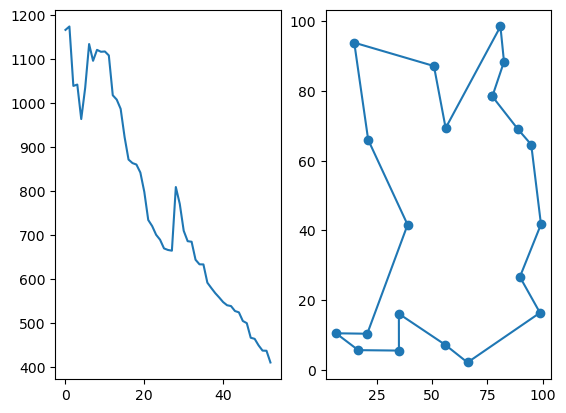

In [391]:
p = create_unifrom_graph(20)
result = tsp(20, p, 0.8, iterations=40000)
create_vis(result[0], p, result[1])

### **NORMAL DISTRIBUTION**

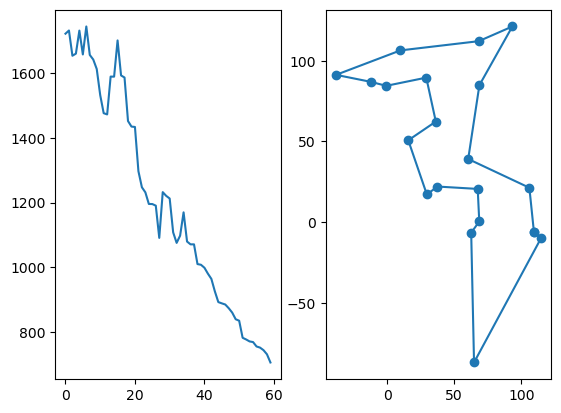

In [392]:
p = create_normal_graph(20)
result = tsp(20, p, 0.8, iterations=40000)
create_vis(result[0], p, result[1])

### **SEPARATED GROUPS GRAPH**

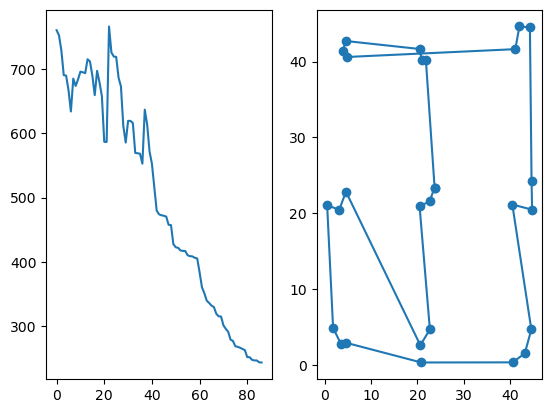

In [393]:
p = create_seperated_group_graph(27)
result = tsp(27, p, 0.8, iterations=100000)
create_vis(result[0], p, result[1])

# N=50

### **UNIFORM DISTRIBUTION**

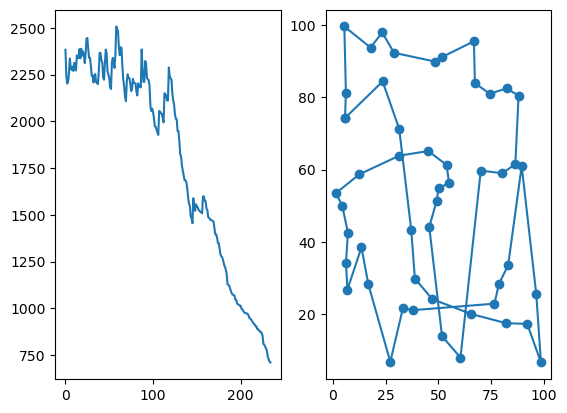

In [394]:
p = create_unifrom_graph(50)
result = tsp(50, p, 0.8, iterations=300000, temperature=lambda x: x*0.99)
create_vis(result[0], p, result[1])

### **NORMAL DISTRIBUTION**

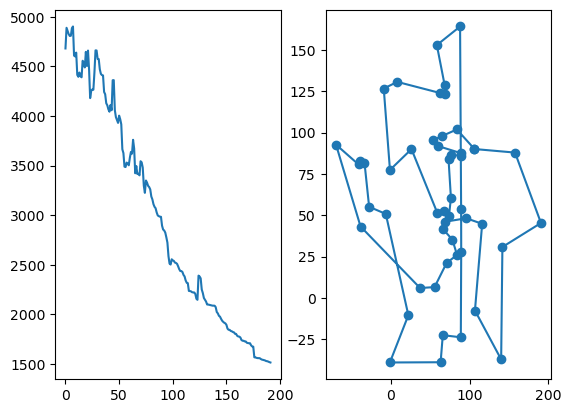

In [395]:
p = create_normal_graph(50)
result = tsp(50, p, 0.8, iterations=300000, temperature=lambda x: x*0.99)
create_vis(result[0], p, result[1])

### **SEPARATED GROUPS GRAPH**

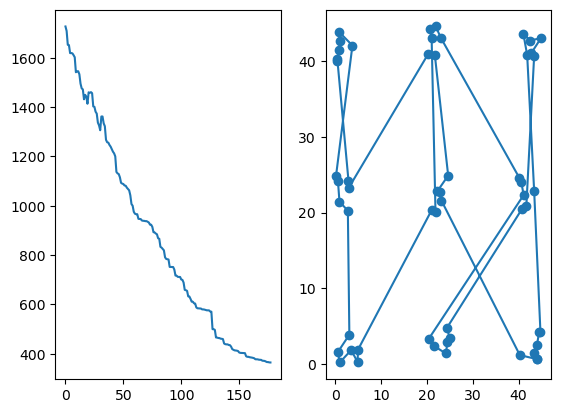

In [396]:
p = create_seperated_group_graph(54)
result = tsp(54, p, 0.8, iterations=400000,temperature=lambda x: x*0.95)
create_vis(result[0], p, result[1])

# N=100

### **UNIFORM DISTRIBUTION**

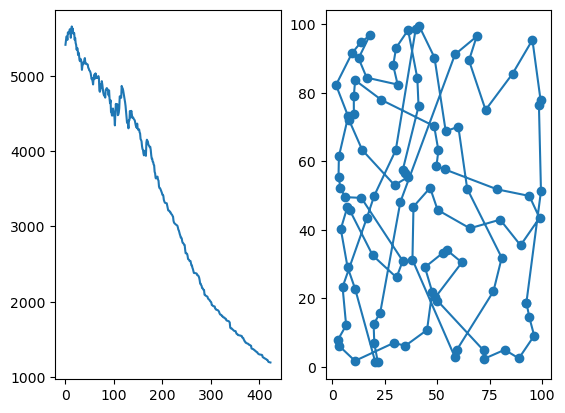

In [397]:
p = create_unifrom_graph(100)
result = tsp(100, p, 0.8, iterations=500000, temperature=lambda x: x*0.99)
create_vis(result[0], p, result[1])

### **NORMAL DISTRIBUTION**

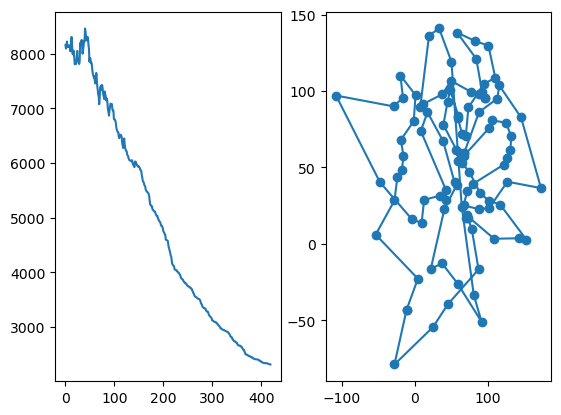

In [398]:
p = create_normal_graph(100)
result = tsp(100, p, 0.8, iterations=500000, temperature=lambda x: x*0.99)
create_vis(result[0], p, result[1])

### **SEPARATED GROUPS GRAPH**

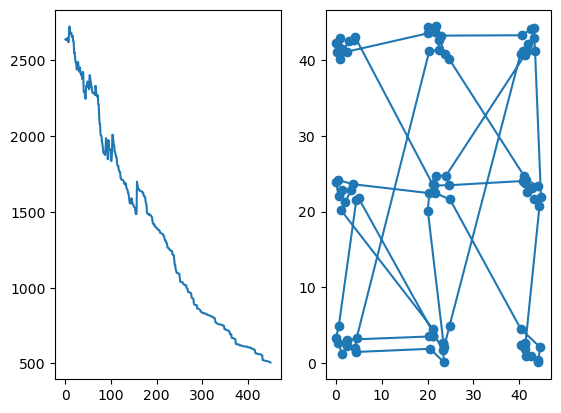

In [399]:
p = create_seperated_group_graph(90)
result = tsp(90, p, 0.8, iterations=500000,temperature=lambda x: x*0.99)
create_vis(result[0], p, result[1])

schemat -> prawd gaussem
Optymalizacje:
+ zapamietujemy najlepszy wynik
+ kilka razy go wykonujemy
+ Tempreratura dazy do 0
+ nie polepsza sie drastcznie

#Zadanie 2 - minimalizacja energi potencjalnej, stan - maicerz binarna
energia potencjalna - kilka rodzajow sasiedztwa ( liczymy sume (lub inna funcke) czarncyh sasaidow przetestuj 5-10), mozna przesunac kilka na razz
+ interpretacja naszej fizyki GIFY ZAWSZE NA PLUS

+ rozne schematy wyzarzania

#Zadanie 3
Trudne planszee 52 najtrudniejsze plansze sudoku
trudny dobor hiperparametrow, moze byc trudno z wykresami
( na piatke)

## **Wizualizacje** podpunkt b - rozwiązania dla arbitrary swap and consecutive swap

In [ ]:
dataset = pd.DataFrame({})

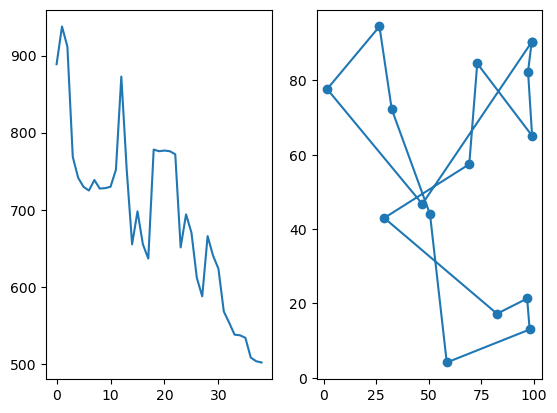

In [411]:
p = create_unifrom_graph(15)
result = tsp(15, p, 0.8, iterations=35000, arbitrary_swap=False)
create_vis(result[0], p, result[1])

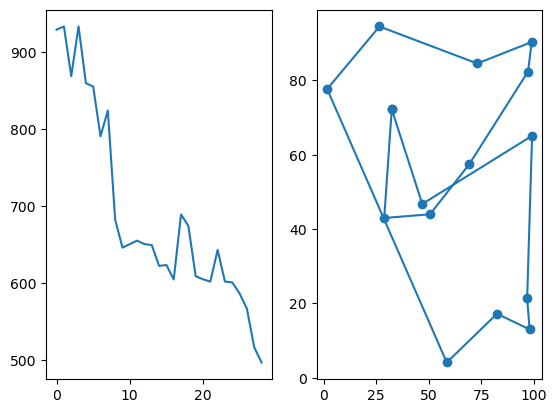

In [415]:
result = tsp(15, p, 0.8, iterations=60000, arbitrary_swap=False)
create_vis(result[0], p, result[1])

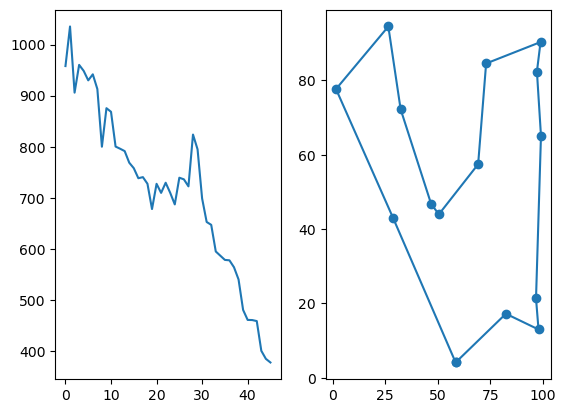

In [412]:
result = tsp(15, p, 0.8, iterations=35000, arbitrary_swap=True)
create_vis(result[0], p, result[1])